# Introduction to ObsPy

In [2]:
import glob
from obspy.core import read

for file in glob.glob('*.z'):
    st = read(file)
    tr = st[0]
    msg = "%s %s %f %f" % (tr.stats.station, str(tr.stats.starttime),
                           tr.data.mean(), tr.data.std())
    print(msg)

# UTC Date Time

In [4]:
from obspy.core import UTCDateTime
UTCDateTime("2012-09-07T12:15:00")

2012-09-07T12:15:00.000000Z

In [5]:
UTCDateTime(2012, 9, 7, 12, 15, 0)

2012-09-07T12:15:00.000000Z

In [6]:
UTCDateTime(1347020100.0)

2012-09-07T12:15:00.000000Z

Timezones are supported as well:

In [7]:
UTCDateTime("2012-09-07T12:15:00+02:00")

2012-09-07T10:15:00.000000Z

## Atrribute access

In [8]:
time = UTCDateTime("2012-09-07T12:15:00")
time.year

2012

In [9]:
time.julday

251

In [10]:
time.timestamp

1347020100.0

In [11]:
time.weekday

4

## Exercises

**Exercise 1:** Calculate the number of hours passed since your birth.

In [12]:
# Your birth date and time in UTC
birth_time = UTCDateTime("1991-01-01T12:00:00")

# Current date and time in UTC
current_time = UTCDateTime()

# Calculate the difference in seconds and convert to hours
hours_passed = (current_time - birth_time) / 3600

print(f"Hours passed since birth: {hours_passed}")

Hours passed since birth: 290246.5530215853


**Exercise 2:** Get a list of 10 UTCDateTime objects, starting yesterday at 10:00 with a spacing of 90 minutes.

In [13]:
# Yesterday at 10:00 in UTC
start_time = UTCDateTime() - 24*3600  # Subtract one day in seconds
start_time.hour = 10
start_time.minute = 0
start_time.second = 0

# List to hold the UTCDateTime objects
time_objects = []

# Generate 10 UTCDateTime objects with a spacing of 90 minutes
for i in range(10):
    time_objects.append(start_time + i * 90 * 60)  # 90 minutes in seconds

for obj in time_objects:
    print(obj)

2024-02-10T10:00:00.939062Z
2024-02-10T11:30:00.939062Z
2024-02-10T13:00:00.939062Z
2024-02-10T14:30:00.939062Z
2024-02-10T16:00:00.939062Z
2024-02-10T17:30:00.939062Z
2024-02-10T19:00:00.939062Z
2024-02-10T20:30:00.939062Z
2024-02-10T22:00:00.939062Z
2024-02-10T23:30:00.939062Z


d:\Anaconda\envs\obspy\lib\site-packages\obspy\core\utcdatetime.py:1256: ObsPyDeprecationWarning: Setting attributes on UTCDateTime instances will raise an Exception in a future version of Obspy.
  warnings.warn(msg, ObsPyDeprecationWarning)


**Exercise 3:** The first session starts at 09:00 and lasts for 3 hours and 15 minutes.\
 Assuming we want to have the coffee break 1234 seconds and 5 microseconds before it ends.\
 At what time is the coffee break?



In [14]:
# Session start time
session_start = UTCDateTime("2024-02-10T09:00:00")
# Session duration is 3 hours and 15 minutes
session_end = session_start + 3*3600 + 15*60

# Coffee break time
coffee_break = session_end - (1234 + 5e-6)

print(f"Coffee break time: {coffee_break}")

Coffee break time: 2024-02-10T11:54:25.999995Z


**Exercise 4:** Assume you had your last cup of coffee yesterday at breakfast.\
 How many minutes do you have to survive with that cup of coffee?

In [15]:
# Last cup of coffee
last_coffee = UTCDateTime() - 24*3600  # Subtract one day in seconds
last_coffee.hour = 8
last_coffee.minute = 0
last_coffee.second = 0

# Current time
current_time = UTCDateTime()

# Time since last coffee in minutes
minutes_since_coffee = (current_time - last_coffee) / 60

print(f"Minutes since the last cup of coffee: {minutes_since_coffee}")

Minutes since the last cup of coffee: 1117.1166666666666


# Reading Seismograms

In [16]:
from obspy import read
st = read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')
print(st)

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


In [18]:
len(st)

1

In [19]:
tr = st[0]  # assign first and only trace to new variable

In [20]:
print(tr)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


Accessing Metadata:

In [21]:
print(tr.stats)  

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})


Accessing Waveform Data:

In [22]:
tr.data

array([-38,  12,  -4, ..., -14,  -3,  -9])

In [23]:
tr.data[0:3]

array([-38,  12,  -4])

In [24]:
len(tr)

36000

## Data Preview

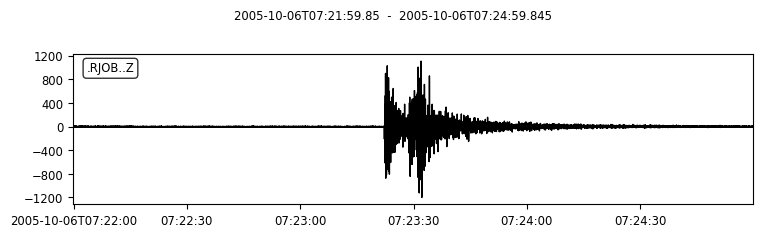

In [27]:
seismogram = st.plot()

# Waveform Plotting

In [ ]:
from obspy.core import read

In [ ]:
singlechannel = read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(singlechannel)

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


In [ ]:
threechannels = read('https://examples.obspy.org/COP.BHE.DK.2009.050')
threechannels += read('https://examples.obspy.org/COP.BHN.DK.2009.050')
threechannels += read('https://examples.obspy.org/COP.BHZ.DK.2009.050')

In [ ]:
print(threechannels)

3 Trace(s) in Stream:
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples
DK.COP..BHN | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


## Basic Plotting

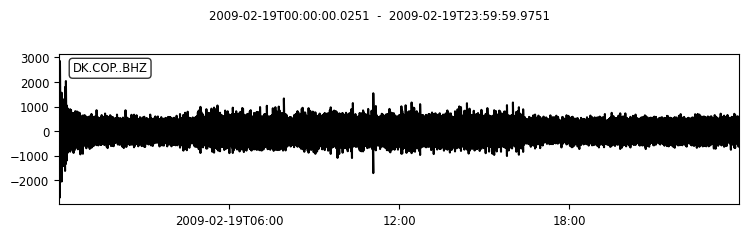

In [ ]:
seismogram_single = singlechannel.plot()

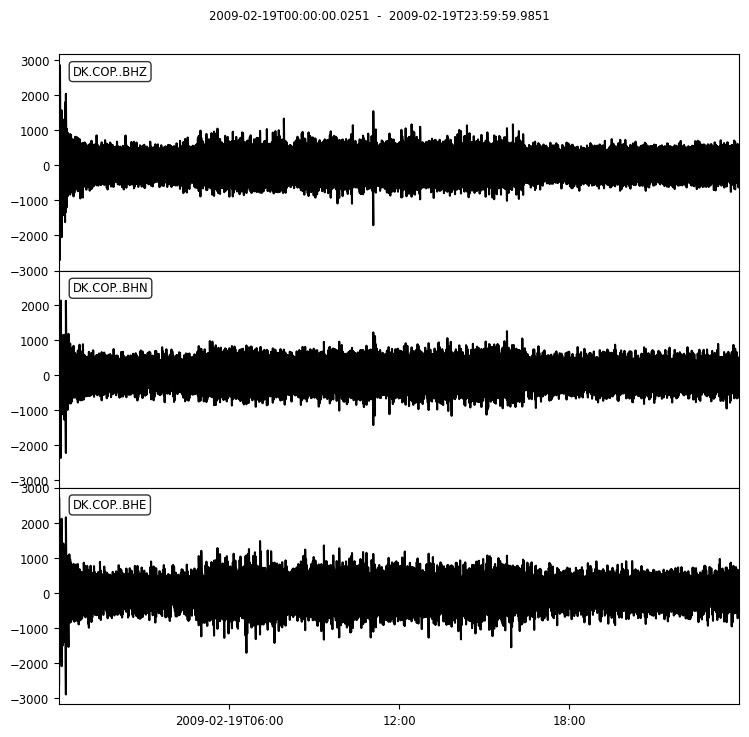

In [ ]:
seismogram_three = threechannels.plot()

## Customized Plots

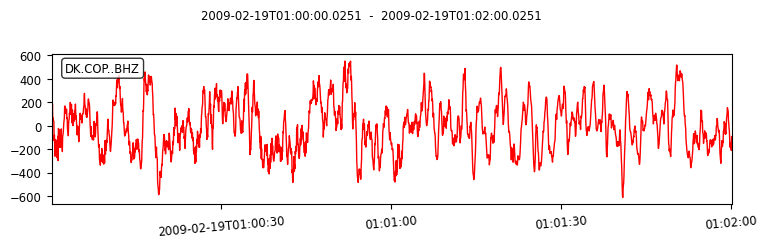

In [ ]:
dt = singlechannel[0].stats.starttime
single_plot = singlechannel.plot(color='red', tick_rotation=5, tick_format='%I:%M %p',
                   starttime=dt + 60*60, endtime=dt + 60*60 + 120)

Save plot:

In [ ]:
singlechannel.plot(outfile='singlechannel.png')

## One-Day Plot

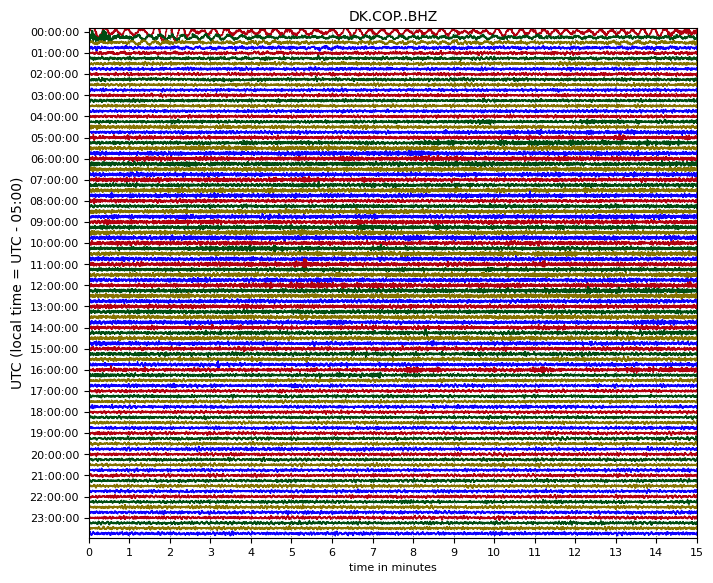

In [ ]:
day_plot_single = singlechannel.plot(type='dayplot')

Event information can be included in the plot as well (experimental feature, syntax might change):

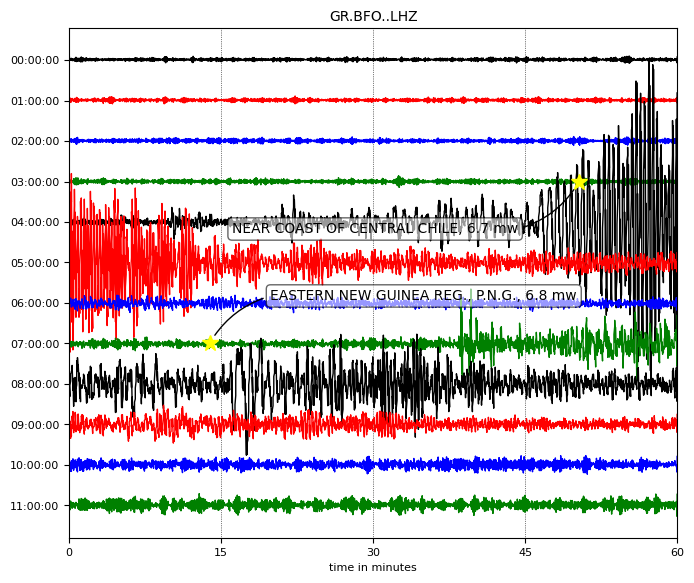

In [ ]:
from obspy import read
st = read("https://examples.obspy.org/GR.BFO..LHZ.2012.108")
st.filter("lowpass", freq=0.1, corners=2)
event_plot = st.plot(type="dayplot", interval=60, right_vertical_labels=False,
                vertical_scaling_range=5e3, one_tick_per_line=True,
                color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
                events={'min_magnitude': 6.5})

## Custom Plotting using Matplotlib


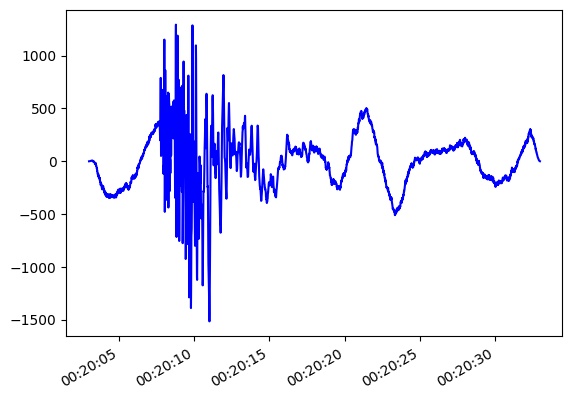

In [ ]:
import matplotlib.pyplot as plt

st = read()
tr = st[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

## Download data

https://service.iris.edu/irisws/fedcatalog/1/ \
http://www.orfeus-eu.org/data/eida/webservices/routing/